In [9]:
import numpy as np

img = np.load("/home/ponoma/workspace/DATA/mirflickr_dataset/diffuser_images_npy/im2564.npy")
img.shape

(270, 480, 3)

In [ ]:
# calculating max and min tensor values of the mirflickr dataset
from dataset import Mirflickr
import torch
from tqdm import tqdm
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0,1,2'
gpu_number = 0

dataset = Mirflickr("/home/ponoma/workspace/DATA/mirflickr_dataset/")

trainLoader = torch.utils.data.DataLoader(dataset, batch_size=32)

# from https://stackoverflow.com/questions/66678052/how-to-calculate-the-mean-and-the-std-of-cifar10-data 
def get_max_min(trainLoader):
    final_in_max = float('-inf')
    final_in_min = float('inf')
    final_target_max = float('-inf')
    final_target_min = float('inf')
    for _, batch in enumerate(tqdm(trainLoader)):
        input, target = batch
        input, target = input.to("cuda"), target.to("cuda")  
        final_in_min = min(final_in_min, input.min())
        final_in_max = max(final_in_max, input.max())
        final_target_min = min(final_target_min, target.min())
        final_target_max = max(final_target_max, target.max())

    # Calculate min and max value of input image
    print("Image Max", final_in_max)
    print("Image Min", final_in_min)

    # Calculate min and max value of target images
    print("Target Max", final_target_max)
    print("Target Min", final_target_min)


get_max_min(trainLoader)

In [ ]:
# Result from above code for Mirflickr dataset

# Image Max tensor(0.9004, device='cuda:0')
# Image Min tensor(-0.0079, device='cuda:0')
# Target Max tensor(1., device='cuda:0')
# Target Min tensor(4.1243e-05, device='cuda:0')

# Total number of parameters in ConvNext model (Lensless Imaging Transformer Decoder):
# 36008928 = 36 million

# Total number of parameters in Lensless Imaging Transformer:
# 16.7 million

In [1]:
from dataset import get_loader
import torch
from tqdm import tqdm
import os

dataset = "Mirflickr"
train_loader, val_loader, test_loader = get_loader(dataset, batch_size=2, num_workers=4)     

# Adapted from: https://stackoverflow.com/questions/60101240/finding-mean-and-standard-deviation-across-image-channels-pytorch 
def get_mean_and_std(data_loader):
    mean_img = 0.0
    mean_target = 0.0
    var_img = 0.0
    var_target = 0.0

    for step, batch in enumerate(tqdm(data_loader)):
        images = batch[0]
        labels = batch[1]

        # Rearrange batch to be the shape of [N, C, W * H]
        image = images.view(images.size(0), images.size(1), -1)
        label = labels.view(labels.size(0), labels.size(1), -1)

        mean_img += image.mean(2).sum(0)        # .mean(2) results in [N, C] tensor (gets mean for each of the three channels for each image individually)
        mean_target += label.mean(2).sum(0)     # .sum(0) results in [N] tensor (sums over the means in all the batches)
        var_img += image.var(2).sum(0)
        var_target += label.var(2).sum(0)

    num_images = len(data_loader.dataset)
    mean_img = mean_img / num_images
    mean_target = mean_target / num_images
    
    var_img = var_img / num_images
    var_target = var_target / num_images
    sd_img = torch.sqrt(var_img)
    sd_target = torch.sqrt(var_target)

    print("GRAYSCALED IMAGES")
    print("Image Mean (RGB order)")
    print(mean_img, "\n")

    print("Image SD")
    print(sd_img, "\n")

    print("Ground truth Mean (RGB order)")
    print(mean_target, "\n")

    print("Ground truth SD")
    print(sd_target, "\n")

get_mean_and_std(train_loader)


100%|██████████| 8750/8750 [01:28<00:00, 99.13it/s] 

GRAYSCALED IMAGES
Image Mean (RGB order)
tensor([0.1516]) 

Image SD
tensor([0.0614]) 

Ground truth Mean (RGB order)
tensor([0.4004]) 

Ground truth SD
tensor([0.2973]) 



In [ ]:
### TRAINING ###
# Image Mean (RGB order)
# tensor([0.1593, 0.1690, 0.1902]) 

# Image SD
# tensor([0.0659, 0.0689, 0.0741]) 

# Ground truth Mean (RGB order)
# tensor([0.3904, 0.4046, 0.4056]) 

# Ground truth SD
# tensor([0.2968, 0.3014, 0.2989])

### VALIDATION ###
# Image Mean (RGB order)
# tensor([0.1583, 0.1685, 0.1903]) 

# Image SD
# tensor([0.0656, 0.0688, 0.0743]) 

# Ground truth Mean (RGB order)
# tensor([0.3897, 0.4046, 0.4061]) 

# Ground truth SD
# tensor([0.2972, 0.3024, 0.3000]) 

### TEST ###
# Image Mean (RGB order)
# tensor([0.1605, 0.1705, 0.1912]) 

# Image SD
# tensor([0.0668, 0.0698, 0.0750]) 

# Ground truth Mean (RGB order)
# tensor([0.3931, 0.4077, 0.4074]) 

# Ground truth SD
# tensor([0.2951, 0.2998, 0.2973])

In [18]:
from PIL import Image
import numpy as np

# preprocess and save selected image
img_number = 65
array = np.load(f"/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed_npy/im{img_number}.npy")
array = np.flipud(np.clip(array/np.max(array), 0,1))
array = (array * 255).astype(np.uint8)
array = array[60:,62:-38,:]

img = Image.fromarray(array)
# img.save(f"/home/ponoma/workspace/Basic_Transformer/original_images/im{img_number}.jpeg")
img.save(f"/home/ponoma/workspace/Basic_Transformer/original_images/im{img_number}_processed.jpeg")

In [11]:
txt_path = '/home/ponoma/workspace/Basic_Transformer/animals.txt'
# Open the text file and read lines into a list
with open(txt_path, 'r') as file:
    # Read each line from the file and strip newline characters
    lines = [int(line.strip()) for line in file.readlines()]

# Print the list to verify
print(lines)

[22, 28, 35, 49, 58, 63, 65, 82, 94, 97, 103, 117, 119, 121, 129, 141, 156, 157, 159, 163, 169, 178, 197, 201, 203, 204, 218, 237, 240, 246, 248, 252, 254, 255, 269, 286, 287, 288, 290, 292, 296, 309, 317, 327, 339, 343, 351, 364, 409, 410, 412, 416, 425, 438, 443, 453, 454, 458, 459, 466, 468, 481, 505, 517, 536, 557, 566, 581, 583, 597, 606, 613, 618, 661, 663, 678, 699, 702, 740, 742, 743, 746, 750, 752, 761, 772, 775, 778, 781, 787, 792, 795, 801, 807, 812, 833, 847, 849, 855, 880, 882, 883, 889, 893, 899, 904, 909, 920, 926, 936, 942, 952, 959, 960, 962, 977, 988, 992, 996, 1015, 1031, 1037, 1040, 1072, 1082, 1085, 1090, 1098, 1112, 1115, 1123, 1124, 1129, 1141, 1147, 1165, 1184, 1197, 1198, 1214, 1232, 1237, 1241, 1244, 1256, 1264, 1291, 1314, 1324, 1335, 1336, 1338, 1339, 1340, 1350, 1352, 1354, 1360, 1366, 1370, 1375, 1386, 1388, 1399, 1416, 1424, 1425, 1426, 1427, 1440, 1448, 1457, 1460, 1468, 1470, 1472, 1492, 1509, 1514, 1534, 1548, 1555, 1572, 1590, 1592, 1604, 1607, 1617, 

/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed_npy/im65.npy


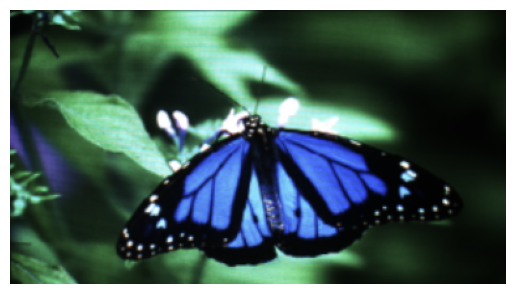

In [17]:
# Found the butterfly image!

clipping = True
for img_number in lines[6:7]:
    # butterfly is lines[6]
    array = np.load(f"/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed_npy/im{img_number}.npy") 
    print(f"/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed_npy/im{img_number}.npy")
    if clipping:
        array = np.clip(array/np.max(array), 0,1)
    else:
        channel_means = np.array([0.3897, 0.4046, 0.4061])
        channel_stds = np.array([0.2972, 0.3024, 0.3000])
        means = np.array(channel_means).reshape(1, 1, -1)  # Reshape to (1, 1, channels)
        stds = np.array(channel_stds).reshape(1, 1, -1) 
        array = (array - means) / stds

        # Check for correct normalization
        print("Mean", np.mean(array))
        print("SD", np.std(array))

    array = np.flipud(array)
    cropped_img = array[60:,62:-38,:]

    #print(cropped_img.shape)
    plt.figure()
    plt.imshow(cropped_img)
    plt.axis('off')


(210, 380, 3)


(-0.5, 379.5, 209.5, -0.5)

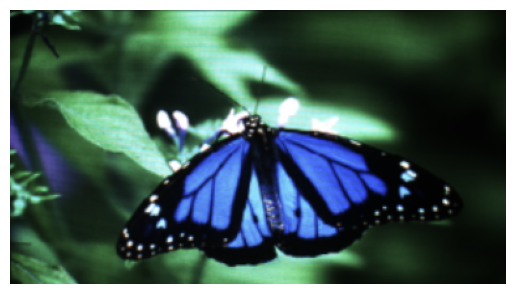

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

# Testing cropping
min_max_norm = True
img_number = 65 #18162 #5326

# NOTE numpy images are BGR not RGB
array = np.load(f"/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed_npy/im{img_number}.npy")[..., ::-1] # moves red to the first channel keeping green and blue as is     
# img = Image.open(f"/home/ponoma/workspace/DATA/mirflickr_dataset/ground_truth_lensed/im{img_number}.jpg.tiff")
# array = np.array(img)

if min_max_norm:
    array = np.clip(array/np.max(array), 0,1)
else:
    channel_means = np.array([0.3897, 0.4046, 0.4061])
    channel_stds = np.array([0.2972, 0.3024, 0.3000])
    means = np.array(channel_means).reshape(1, 1, -1)  # Reshape to (1, 1, channels)
    stds = np.array(channel_stds).reshape(1, 1, -1) 
    array = (array - means) / stds

    # Check for correct normalization
    print("Mean", np.mean(array))
    print("SD", np.std(array))

array = np.flipud(array)
cropped_img = array[60:,62:-38,:]

print(cropped_img.shape)
plt.imshow(cropped_img)
plt.axis('off')